In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
X_train = pd.read_csv("X_train_views.csv")
X_test = pd.read_csv("X_test_views.csv")
y_train = pd.read_csv("y_train_views.csv").squeeze()
y_test = pd.read_csv("y_test_views.csv").squeeze()

In [3]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [4]:
y_pred_log = lr_model.predict(X_test)

In [5]:
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred_log))
r2_log = r2_score(y_test, y_pred_log)

In [6]:
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

In [7]:
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
r2_actual = r2_score(y_test_actual, y_pred_actual)

In [8]:
print("=== Evaluation in Log1p Scale ===")
print("RMSE (log):", rmse_log)
print("R2 Score (log):", r2_log)

print("\n=== Evaluation in Original Scale ===")
print("RMSE (original):", rmse_actual)
print("R2 Score (original):", r2_actual)

=== Evaluation in Log1p Scale ===
RMSE (log): 1.1960863333284286
R2 Score (log): 0.19453093508280828

=== Evaluation in Original Scale ===
RMSE (original): 3091719.7102543344
R2 Score (original): -0.0034031502640745614


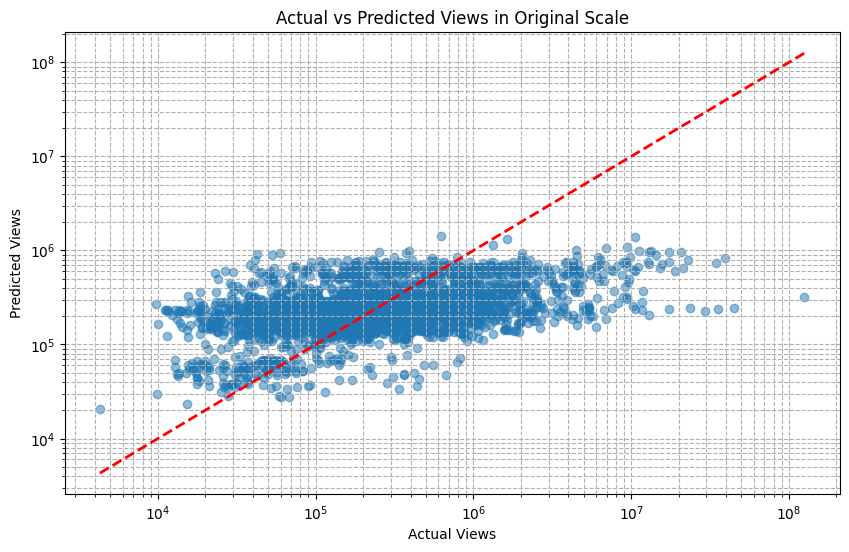

In [9]:
# plot original scale
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], 
         [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted Views in Original Scale")
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which="both", ls="--")
plt.show()

In [ ]:
# how to read the plot:
# The plot shows the relationship between actual and predicted views in the original scale.
# Points close to the red dashed line indicate better predictions.
# The x-axis represents actual views, while the y-axis represents predicted views.
# The logarithmic scale helps visualize the distribution of views, especially for large values.
# The plot is useful for understanding the model's performance across different view counts.